In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
%autosave 30

Autosaving every 30 seconds


In [4]:
## Loading the MNIST dataset

mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist["data"], mnist["target"]

# features
X.shape

(70000, 784)

In [7]:
# label
y.shape

(70000,)

#### There are 70,000 images and each image has 784 features. This is because each image is 28 x 28 pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black).

Let's visualize a one digit from the dataset.

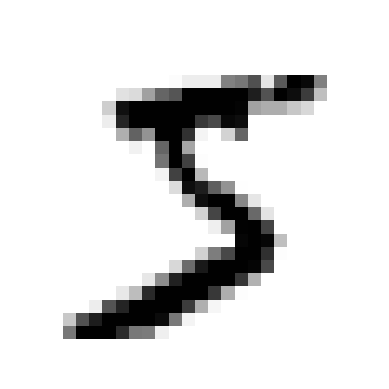

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

=> Looks kinda like 5 and that indeed label val tells.

In [10]:
y.unique()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
## since, label column has string vals, lets typecast

y = y.astype(np.uint8)
y.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

#### test_train_split:

But the thing is MNIST dataset is actually already split into a training set and test set already (the last 10,00 images).
The training set is already shuffled for us, which is good beacuse this gurantees that all cross-validation folds will be similar as we don't want one fold to be missing some digits.

**Moreover, some learning algos are sensitive to the order of the training instances, and they perform poorly if they get similar instances in a row, Shuffling ensures this won't happen.**

In [12]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_train, x_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y[:60000], y[60000:]

In [14]:
## training features

x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
## training labels

y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

### # Training a Binary Classifier:

for 5 and not_5

In [16]:
## Target vectors

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD (Stochastic Gradient Descent) classifer: 

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=1999)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=1999)

#### => This classifier relies on randomness during training and hence the name `Stochastic`.

In [18]:
## prediction for some_image

sgd_clf.predict(some_digit.reshape(1, -1))

array([ True])

### # Implementing Cross-Validation:

In [19]:
## Let's compute accuaracy using cross_val-score() cross-validation:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, x_train, y_train_5, cv=3, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.965) total time=   8.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV] END ................................ score: (test=0.952) total time=   8.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.5s remaining:    0.0s


[CV] END ................................ score: (test=0.954) total time=   9.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.0s finished


In [20]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Average Score: ", scores.mean())
    print("Standard error: ", scores.std())

In [21]:
display_scores(scores)

Scores:  [0.96485 0.952   0.9542 ]
Average Score:  0.9570166666666666
Standard error:  0.005611347629778625


=> pretty amazing, huh!

### # Cross-validation using Stratified Sampling:

This cross-validation object is a variation of KFold that returns
stratified folds. **The folds are made by preserving the percentage of
samples for each class.**

#### => Implies that each class is gonna have right proportion of true and false entries in the label column.

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    # data segregation for cross-validation
    x_train_fold = x_train.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_train_fold = y_train_5.iloc[train_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(x_train_fold, y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold) # number of correct predictions
    print(n_correct/len(y_pred))   

0.96525
0.94595
0.9472


#### # Before getting much excited, let's look at a very dumb classifier that just classifies every single image in the `not-5` class:

In [23]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):pass
    
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [24]:
## Let's compute its accuracy

never5clf = Never5Classifier()
cross_val_score(never5clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

#### => Man, seriously! over 90% for the dumb one?

In [25]:
y_train_5.value_counts()[1] / (y_train_5.value_counts()[0] + y_train_5.value_counts()[1])

0.09035

#### => That's because only 10% of images reperesent the digit 5, thus even with that dumb classier we are right 90% of the time.

Demonstrating **`Accuracy ain't the reliable metric for the classfication`** especially when dealing with **skewed datasets**.